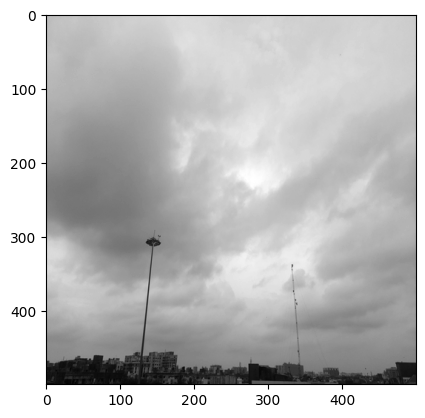

In [ ]:
#Đọc ảnh đen trắng và hiển thị
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh
img = cv2.imread('Small Sample BMP Image File Download.bmp', cv2.IMREAD_GRAYSCALE)

# Hiển thị ảnh
plt.imshow(img, cmap='gray')
plt.show()


In [ ]:
#Thiết lập kích thước khối nhỏ và số khối nhỏ trong ảnh
block_size = 8
num_blocks = (img.shape[0] // block_size, img.shape[1] // block_size)


In [ ]:
#Giấu thông tin thủy vân vào ảnh
watermark = "10101010" # Chuỗi thủy vân cần giấu
bit_index = 0

for i in range(num_blocks[0]):
    for j in range(num_blocks[1]):
        block = img[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]

        # Nếu còn bit thủy vân để giấu
        if bit_index < len(watermark):
            # Lấy bit thủy vân tiếp theo
            bit = int(watermark[bit_index])

            # Giấu bit vào pixel cuối cùng của khối
            block[-1, -1] = (block[-1, -1] & 254) | bit

            # Tăng chỉ số bit
            bit_index += 1

        # Cập nhật khối vào ảnh gốc
        img[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = block


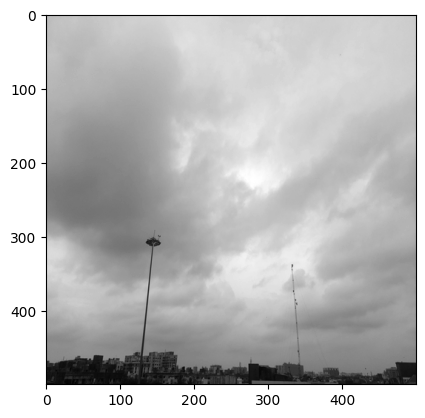

In [ ]:
#Hiển thị ảnh mới với thông tin thủy vân đã được giấu
plt.imshow(img, cmap='gray')
plt.show()


In [ ]:
#Trích xuất thông tin thủy vân từ ảnh
extracted_watermark = ""

for i in range(num_blocks[0]):
    for j in range(num_blocks[1]):
        block = img[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]

        # Lấy bit thủy vân từ pixel cuối cùng của khối
        bit = block[-1, -1] & 1

        # Thêm bit vào chuỗi thủy vân
        extracted_watermark += str(bit)

print("Extracted watermark: ", extracted_watermark)


Extracted watermark:  101010101010000011011011100101010001101110000010100100100001111000010111010001111110111100110011101010111000000101101011110001001101100100111110000001101011111011001110100010001111011000100101001100000110111100010111000110110101100110111001101010110100111111011010101100110101101110101001111111011000000111001011000011010111011111010111101001000011111000110101100001000000111110011100001100011001011011001110100011010110111111100110101010001000110001010011100000010001000110110010000011110011000010101001111101110011100101011110000001101000011100111010110010110101101110100111010101101111101011110110010010001101001001110011010100001000011011010101001001000110100001101011010111000000010110100010000010000110101100000110000011000101110100000011101111100000010010011101110111110011011001110101101000000010111000101011001110110100110011100000111001000111111001101010101111001010010111101000101101111011010100000100101100110110101111110110001010001000100010100111111001001001000000